In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

base_dir = "G:/.shortcut-targets-by-id/0B3ejcGO9fA5eYXlHMW9tekVERmc/JB labs documents/Updated_JB_documents_2019/JB LAB_Projects/biofilm_qtl/data/growth"




In [2]:
od_data = {}

with open(base_dir + os.sep + '20240925_plate_reader_od_calibration.asc','r' ) as f_in: 
    section_break = '<>'
    for line in f_in: 
        if section_break in line: 
            break
        well = line.strip()
        od = float(next(f_in).strip())
        od_data[well] = od


blank_wells = {'EMM': ['H' + str(jj) for jj in range(1,7)], 
               'YES': ['H' + str(jj) for jj in range(7,13)]}

#Dilution factor for each row
od_factors = [1/3**nn for nn in range(0,7)]

#Put initial OD of each of the four cultures
initial_ods = {'EMM': {'JB50': 3.9,
                      'JB914': 5.0},
              'YES': {'JB50': 4.1,
                      'JB914': 5.5},
                      }

column_assignments = {1:('EMM','JB50','R1'),
                      2:('EMM','JB914','R1'),
                      3:('EMM','JB50','R2'),
                      4:('EMM','JB914','R2'),
                      5:('EMM','JB50','R3'),
                      6:('EMM','JB914','R3'),
                      7:('YES','JB50','R1'),
                      8:('YES','JB914','R1'),
                      9:('YES','JB50','R2'),
                      10:('YES','JB914','R2'),
                      11:('YES','JB50','R3'),
                      12:('YES','JB914','R3')
                      }


od_data_annotated = {}
# well: (media,strain,rep, od_cuvette,od_plate_reader)

#Average all blanks together to make an 
ref_plate_reader = {}
for media in ['EMM','YES']:
    ref_plate_reader[media] = np.mean([od_data[well] for well in blank_wells[media]])



for col in range(1,13):
    media, strain, rep = column_assignments[col]
    initial_od = initial_ods[media][strain]
    ref_plate_reader_media = ref_plate_reader[media]
    for jj, row in enumerate('ABCDEFG'):
        od_cuvette = initial_od*od_factors[jj]
        well = row + str(col)
        od_plate_reader = od_data[well] - ref_plate_reader_media

        od_data_annotated[well]  = (media,strain,rep, od_cuvette,od_plate_reader)

od_data_annotated_df = pd.DataFrame.from_dict(od_data_annotated, orient = 'index', columns = ['media','strain','rep','od_cuvette','od_plate_reader'])

od_data_annotated_df



,media,strain,rep,od_cuvette,od_plate_reader
A1,EMM,JB50,R1,3.900000,0.397033
B1,EMM,JB50,R1,1.300000,0.131033
C1,EMM,JB50,R1,0.433333,0.040133
D1,EMM,JB50,R1,0.144444,0.015733
E1,EMM,JB50,R1,0.048148,0.006133
...,...,...,...,...,...
C12,YES,JB914,R3,0.611111,0.020350
D12,YES,JB914,R3,0.203704,0.008050
E12,YES,JB914,R3,0.067901,0.004250
F12,YES,JB914,R3,0.022634,0.002050


In [21]:
m, b = np.polyfit(od_data_annotated_df['od_plate_reader'],od_data_annotated_df['od_cuvette'] , 1)
print(m)
print(b)

11.538955299955253
0.1403895740813761


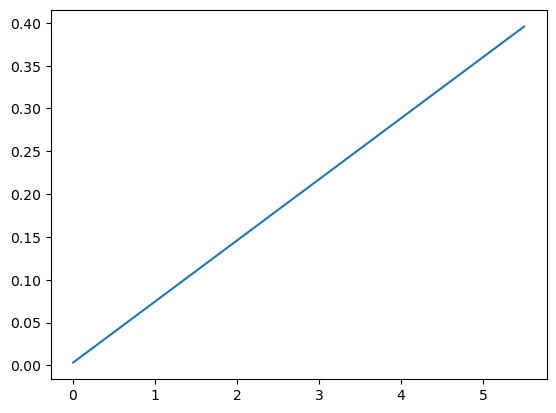

In [22]:
fig, ax = plt.subplots(1,1)
ax.plot(xdata, ydata)

Text(0.5, 0, 'OD from plate reader')

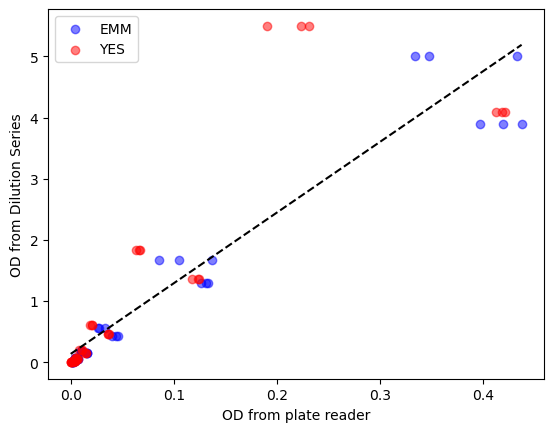

In [26]:
fig, ax = plt.subplots(1,1)

media_colors = {'EMM':'b','YES': 'r'}

for media in ['EMM','YES']:
    data_subset = od_data_annotated_df[od_data_annotated_df['media']==media]
    ax.scatter(data_subset['od_plate_reader'],data_subset['od_cuvette'],alpha = 0.5, color = media_colors[media], label=media)
    #ax.scatter(np.log(data_subset['od_cuvette']),np.log(data_subset['od_plate_reader']),alpha = 0.5, color = media_colors[media], label=media)


xdata = np.linspace(np.min(od_data_annotated_df['od_plate_reader']), np.max(od_data_annotated_df['od_plate_reader']),4)
ydata = m*xdata + b
ax.plot(xdata, ydata, linestyle = '--', color='k')

plt.legend()
ax.set_ylabel('OD from Dilution Series')
ax.set_xlabel('OD from plate reader')

c:\Users\bheineike\anaconda3\envs\bmh_bioinformatics\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'OD from plate reader')

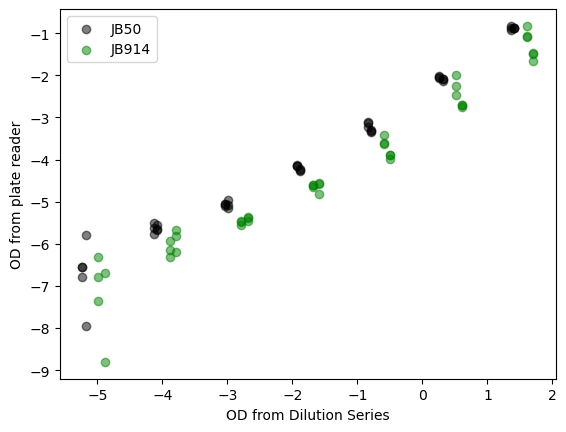

In [24]:
fig, ax = plt.subplots(1,1)

strain_colors = {'JB914':'g','JB50': 'k'}

for strain in ['JB50','JB914']:
    data_subset = od_data_annotated_df[od_data_annotated_df['strain']==strain]
    ax.scatter(np.log(data_subset['od_cuvette']),np.log(data_subset['od_plate_reader']),alpha = 0.5, color = strain_colors[strain], label=strain)

plt.legend()
ax.set_xlabel('OD from Dilution Series')
ax.set_ylabel('OD from plate reader')